In [54]:
import pandas as pd
import numpy as np

train = pd.read_csv("Train.csv")

train.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0


In [119]:
# geo_data
geo_data = pd.DataFrame()

geo_data['lat'] = train['LAT']
geo_data['lan'] = train['LON']
geo_data['NO2'] = train['GT_NO2']

geo_data = geo_data.dropna()


# cordinates 
cordinates = pd.DataFrame()
cordinates['lat'] = geo_data['lat']
cordinates['lan'] = geo_data['lan']

In [120]:
cordinates

,lat,lan
0,45.601585,11.903551
1,45.371005,11.840830
2,45.045825,12.060869
3,45.104075,11.553241
4,45.038758,11.790152
...,...,...
86579,45.498227,9.556232
86580,45.142541,10.043836
86581,45.842207,9.351658
86582,45.113503,8.874065


In [121]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [122]:
kmeans.fit(cordinates)
labels = kmeans.labels_

In [123]:
cordinates['cluster'] = labels
cordinates['NO2'] = geo_data['NO2']
cordinates

,lat,lan,cluster,NO2
0,45.601585,11.903551,4,31.000
1,45.371005,11.840830,4,42.000
2,45.045825,12.060869,4,31.000
3,45.104075,11.553241,1,30.000
4,45.038758,11.790152,4,58.000
...,...,...,...,...
86579,45.498227,9.556232,3,39.750
86580,45.142541,10.043836,2,30.125
86581,45.842207,9.351658,3,28.325
86582,45.113503,8.874065,0,21.250


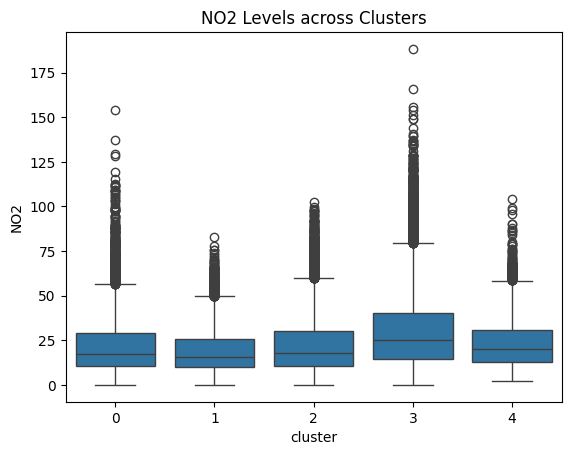

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='cluster', y='NO2', data=cordinates)
plt.title("NO2 Levels across Clusters")
plt.show()

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

X = cordinates['cluster']
y = cordinates['NO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=94, test_size = 0.2)

In [106]:
X_train = np.expand_dims(X_train, axis = -1)

In [107]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [108]:
X_test = np.expand_dims(X_test, axis = -1)

reg.score(X_test, y_test)

0.1247801128712317

In [109]:
test = pd.read_csv("Test.csv")


In [110]:
#cordinates
test_cordinates = pd.DataFrame()

test_cordinates['lat'] = test['LAT']
test_cordinates['lan'] = test['LON']

In [111]:
test_cordinates

,lat,lan
0,45.289376,11.642394
1,45.836941,12.510362
2,45.582894,8.842165
3,45.131947,10.015742
4,45.186329,9.146666
...,...,...
6571,45.836941,12.510362
6572,45.582894,8.842165
6573,45.131947,10.015742
6574,45.186329,9.146666


In [112]:
test_clusters = kmeans.predict(test_cordinates)

# Using cartesian product

In [2]:
import pandas as pd

train = pd.read_csv("Train.csv")

# geo_data
geo_data = pd.DataFrame()

geo_data['lat'] = train['LAT']
geo_data['lan'] = train['LON']
geo_data['NO2'] = train['GT_NO2']

geo_data = geo_data.dropna()


# cordinates 
cordinates = pd.DataFrame()
cordinates['lat'] = geo_data['lat']
cordinates['lan'] = geo_data['lan']

In [3]:
def lat_lon_to_cartesian(lat, lon, radius=6371):
    lat = np.radians(lat)
    lon = np.radians(lon)
    x = radius * np.cos(lat) * np.cos(lon)
    y = radius * np.cos(lat) * np.sin(lon)
    z = radius * np.sin(lat)
    return np.array([x, y, z])

In [4]:
import numpy as np
cartesian_data = np.array([lat_lon_to_cartesian(lat, lon) for lat, lon in np.array(cordinates)])

NameError: name 'np' is not defined

array([[4361.57759498,  919.41086942, 4552.02872752],
       [4380.47535625,  918.38729248, 4534.05353236],
       [4402.01024553,  940.56512202, 4508.57893904],
       ...,
       [4379.28666828,  721.19056155, 4570.70820015],
       [4442.22552293,  693.57399946, 4513.89283332],
       [4401.9745259 ,  737.90010675, 4546.18133226]])

In [133]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    init="random",
    n_clusters=20,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [134]:
kmeans.fit(cartesian_data)
labels = kmeans.labels_

In [135]:
cordinates['cluster'] = labels
cordinates['NO2'] = geo_data['NO2']
cordinates

,lat,lan,cluster,NO2
0,45.601585,11.903551,16,31.000
1,45.371005,11.840830,14,42.000
2,45.045825,12.060869,2,31.000
3,45.104075,11.553241,11,30.000
4,45.038758,11.790152,11,58.000
...,...,...,...,...
86579,45.498227,9.556232,1,39.750
86580,45.142541,10.043836,8,30.125
86581,45.842207,9.351658,10,28.325
86582,45.113503,8.874065,3,21.250


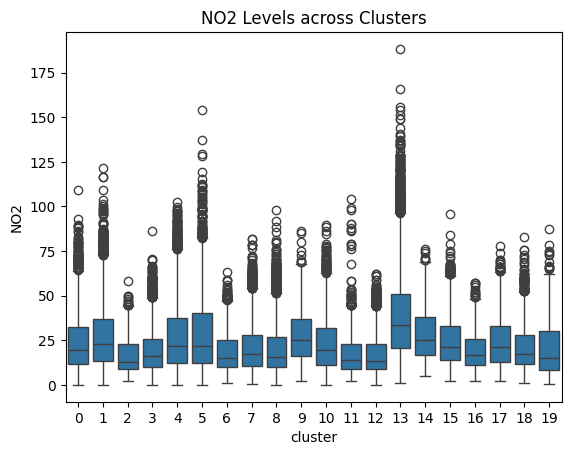

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='cluster', y='NO2', data=cordinates)
plt.title("NO2 Levels across Clusters")
plt.show()

# HDBSCAN

In [66]:
import pandas as pd
import numpy as np

train = pd.read_csv("Train.csv")

# geo_data
geo_data = pd.DataFrame()

geo_data['lat'] = train['LAT']
geo_data['lan'] = train['LON']
geo_data['NO2'] = train['GT_NO2']

geo_data = geo_data.dropna()

In [67]:
# filter out outliers 

Q1 = geo_data['NO2'].quantile(0.25)
Q3 = geo_data['NO2'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = geo_data[(geo_data['NO2'] >= lower_bound) & (geo_data['NO2'] <= upper_bound)]

print(len(filtered_data))
print(len(geo_data))

79509
82051


In [68]:
# cordinates 
cordinates = pd.DataFrame()
cordinates['lat'] = filtered_data['lat']
cordinates['lan'] = filtered_data['lan']

In [69]:
def lat_lon_to_cartesian(lat, lon, radius=6371):
    lat = np.radians(lat)
    lon = np.radians(lon)
    x = radius * np.cos(lat) * np.cos(lon)
    y = radius * np.cos(lat) * np.sin(lon)
    z = radius * np.sin(lat)
    return np.array([x, y, z])

cordinates = np.array(cordinates)

cartesian_cordinates = np.array([lat_lon_to_cartesian(lat, lon) for lat, lon in cordinates])

In [70]:
from sklearn.cluster import DBSCAN

cartesian_cordinates = np.array(cartesian_cordinates)

clustering = DBSCAN(eps=5, min_samples=5).fit(cartesian_cordinates)

labels = clustering.labels_

In [71]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [72]:
cordinates = pd.DataFrame()
cordinates['lat'] = filtered_data['lat']
cordinates['lan'] = filtered_data['lan']
cordinates['clusters'] = labels
cordinates['NO2'] = filtered_data['NO2']

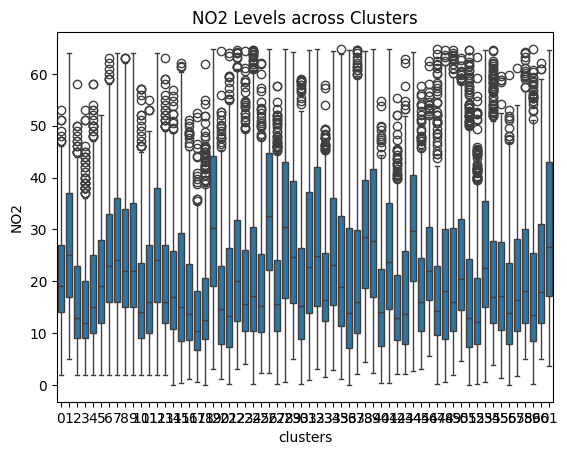

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='clusters', y='NO2', data=cordinates)
plt.title("NO2 Levels across Clusters")
plt.show()

In [74]:
cordinates

,lat,lan,clusters,NO2
0,45.601585,11.903551,0,31.000
1,45.371005,11.840830,1,42.000
2,45.045825,12.060869,2,31.000
3,45.104075,11.553241,3,30.000
4,45.038758,11.790152,4,58.000
...,...,...,...,...
86579,45.498227,9.556232,41,39.750
86580,45.142541,10.043836,58,30.125
86581,45.842207,9.351658,59,28.325
86582,45.113503,8.874065,27,21.250


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

X = cordinates['clusters']
y = cordinates['NO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=94, test_size = 0.2)

X_train = np.expand_dims(X_train, axis = -1)

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [76]:
X_test = np.expand_dims(X_test, axis = -1)

reg.score(X_test, y_test)

0.13091328475876496